In [2]:
# 1. Įsidiekite programinę įrangą
import imageio.v3 as imageio
import numpy as np
import matplotlib.pyplot as plt
import pandas
import sklearn

In [ ]:
# 2.1. Veiksmai su matricomis
# Pamėginkite įsivesti naujas matricas ir atlikti veiksmus su jomis.

A = np.array([[1, 2], [3, 4]])
B = np.array([[1, 2], [3, 4]])

C = A + B
D = A * B
E = np.matmul(A,B)

print("C=", C)
print("D=", D)
print("E=", E)

In [ ]:
# 2.2. MSE skaičiavimas
# Išanalizuokite žemiau pateikta MSE skaičiavimo pavyzdį.

x = np.arange(0, 5.0, 0.1)
y = np.sin(x)
y2 = y + np.random.normal(0,0.1,len(y))

plt.plot(x, y)
plt.plot(x, y2)
plt.show()

MSE = (1/len(y))*np.sum(np.power((y-y2),2))

print("MSE=", MSE)

In [ ]:
# 2.3. Atlikite veiksmus su paveikslėliais
# Pamėginkite pritaikyti įvarias numpy, ndimage ir matplotlib funkcijas paveikslėliams.

ktu = imageio.imread('assets/ktu.png')
new_ktu = np.full(ktu.shape, [0, 0, 0, 255])

kernel_variant = 0
if kernel_variant == 0:
    # Edge detection
    kernel_coef = 1
    kernel = np.array([
        [ 0, -1,  0],
        [-1,  4, -1],
        [ 0, -1,  0]
    ])
elif kernel_variant == 1:
    # 3x3 Gaussian blur
    kernel_coef = 1/16
    kernel = np.array([
        [1, 2, 1],
        [2, 4, 2],
        [1, 2, 1]
    ])

for y, row in enumerate(ktu):
    for x, pixel in enumerate(row):
        neighbour_sum = [0, 0, 0]
        for dy, kernel_row in enumerate(kernel):
            neighbour_y = y + dy - kernel.shape[0]//2
            for dx, kernel_pixel_coeff in enumerate(kernel_row):
                neighbour_x = x + dx - kernel.shape[1]//2

                if 0 <= neighbour_x < ktu.shape[0] and 0 <= neighbour_y < ktu.shape[1]:
                    neighbour_sum[0] += ktu[neighbour_y][neighbour_x][0] * kernel_pixel_coeff
                    neighbour_sum[1] += ktu[neighbour_y][neighbour_x][1] * kernel_pixel_coeff
                    neighbour_sum[2] += ktu[neighbour_y][neighbour_x][2] * kernel_pixel_coeff

        new_ktu[y][x] = [
            neighbour_sum[0] * kernel_coef,
            neighbour_sum[1] * kernel_coef,
            neighbour_sum[2] * kernel_coef,
            255
        ]

plt.imshow(new_ktu)

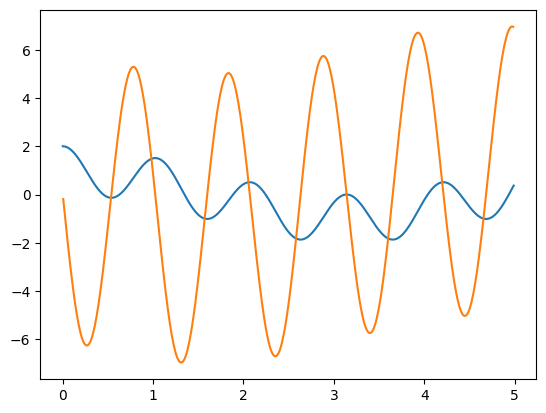

In [32]:
# 2.4. Išvestinių skaičiavimas
# Pakeiskite žingsnio ir kitus parametrus.

delta_x = 0.01

x = np.arange(0, 5.0, delta_x)
y = np.cos(x)+np.cos(6*x)

dydx = np.diff(y)/delta_x

plt.plot(x, y)
plt.plot(x[1:]-delta_x/2, dydx)
plt.show()

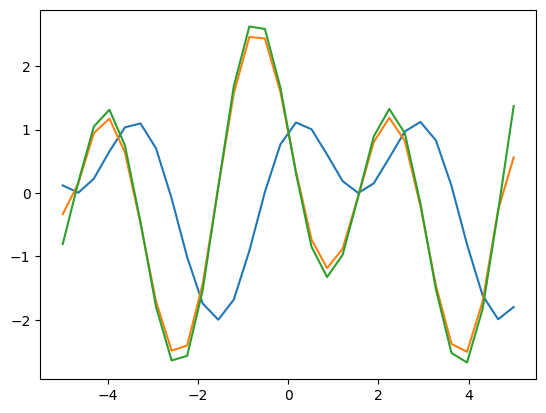

In [44]:
# 2.5. Išvestinės skaičiavimas su np.gradient
# * Kodėl dydx_numerical ir dydx_analytical reikšmės nesutampa?
#   Ats.: Nes 'dydx_numerical' tiktais aproksimuoja, sources: https://numpy.org/doc/stable/reference/generated/numpy.gradient.html
#         O 'dydx_analytical' yra tiksli formulė išvesta ranka
#
# * Pakeiskite y=f(x) funkciją ir braižomus parametrus.

x = np.linspace(-5, 5, 30)
dx = x[1]-x[0]

y = np.sin(x)+np.cos(2*x)
#y = np.tan(x)+1/(2*x)

dydx_numerical = np.gradient(y, dx)
dydx_analytical = np.cos(x)-2*np.sin(2*x)

plt.plot(x, y)
plt.plot(x, dydx_numerical)
plt.plot(x, dydx_analytical)
plt.show()

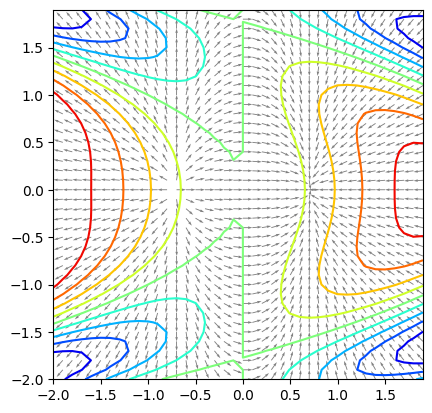

In [58]:
# 2.6. Gradientinio lauko radimas
# Išanalizuokite žemiau pateiktą kodą. Pamėginkite atvaizduoti kitas $z(x,y)$ funkcijas.

feature_x = np.arange(-2, 2, 0.1)
feature_y = np.arange(-2, 2, 0.1)

x, y = np.meshgrid(feature_x, feature_y)

#z = x * np.exp(-(x**2 + y**2))
z = x * np.sin((x + y**2))

u = 1*np.exp(-(x**2 + y**2))+x*np.exp(-(x**2 + y**2))*(-2*x)
v = x*np.exp(-(x**2 + y**2))*(-2*y)

norm = np.linalg.norm(np.array((u, v)), axis=0)
u = u / norm
v = v / norm

fig, ax = plt.subplots(1, 1)
ax.set_aspect(1)
ax.quiver(x, y, u, v, units='xy', scale=10, color='gray')
ax.contour(x, y, z, 10, cmap='jet')

TensorFlow version: 2.15.0


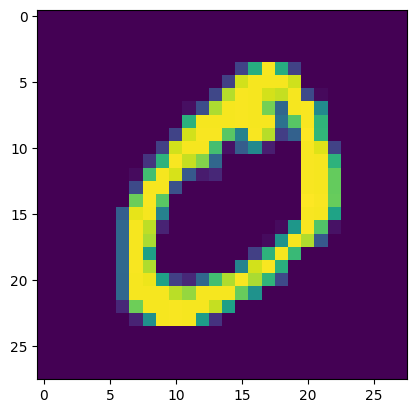

In [65]:
# 2.7. MNIST duomenų bazė
# Pamėginkite išsiaiškinti duomenų tipą ir juos atvaizduoti.

import tensorflow as tf
print("TensorFlow version:", tf.__version__)

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

plt.imshow(x_train[1])

In [68]:
# 2.8. Pandas biblioteka
# Išanalizuokite žemiau pateiktą kodą, pamėginkite rasti įvairių duomenų
# rinkinių internete ir jiems pritaikyti žemiau esantį kodą. Atlikite duomenų filtravimą,
# atvaizdavimą ir pritaikykite įvairiais Pandas bibliotekos funkcijas.
#
# https://pandas.pydata.org/docs/user_guide/10min.html


import pandas as pd

df1 = pd.DataFrame({
    "A": 1.0,
    "B": pd.Timestamp("20130102"),
    "C": pd.Series(1, index=list(range(4)), dtype="float32"),
    "D": np.array([3] * 4, dtype="int32"),
    "E": pd.Categorical(["test", "train", "test", "train"]),
    "F": "foo",
})

print(df1)

df2 = pd.read_csv('assets/beers.csv')

print(df2[df2.abv>0.09].label)

     A          B    C  D      E    F
0  1.0 2013-01-02  1.0  3   test  foo
1  1.0 2013-01-02  1.0  3  train  foo
2  1.0 2013-01-02  1.0  3   test  foo
3  1.0 2013-01-02  1.0  3  train  foo
21                 Lower De Boom (21st Amendment Brewery)
32                    Hop Crisis (21st Amendment Brewery)
70             London Balling (Against the Grain Brewery)
134                Quakertown Stout (Armadillo Ale Works)
171     Devils Tramping Ground Tripel (Aviator Brewing...
                              ...                        
2279    Lee Hill Series Vol. 4 - Manhattan Style Rye A...
2281    Lee Hill Series Vol. 3 - Barrel Aged Imperial ...
2286    Upslope Imperial India Pale Ale (Upslope Brewi...
2312                   Voodoo Love Child (Voodoo Brewery)
2315                            Gran Met (Voodoo Brewery)
Name: label, Length: 84, dtype: object


Text(0, 0.5, 'Ice Cream Profits')

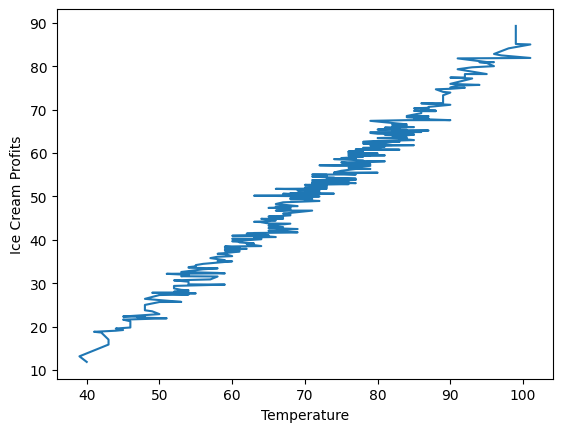

In [80]:
df = pd.read_csv('assets/Ice Cream Sales - temperatures.csv')

df.sort_values('Ice Cream Profits', ascending=False, inplace=True)

plt.plot(df['Temperature'], df['Ice Cream Profits'])
plt.xlabel('Temperature')
plt.ylabel('Ice Cream Profits')